In [1]:
##Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

##load the file and update the column names
##https://archive.ics.uci.edu/ml/datasets/Heart+Disease data source
df = pd.read_csv('/Users/jacobseo/cs7641/assignment1/data/processed.cleveland.data', header=None)

df.columns = ['age','sex','chestPain','restingBloodPressure','cholesterol','fastingBloodSugar','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

messy_df = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]
clean_df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
##data Split to independent variable
X = clean_df.drop('num', axis=1).copy()

y = clean_df['num'].copy()

## category attriutes into binary format
pd.get_dummies(X, columns=['chestPain']).head()

X_encoded = pd.get_dummies(X, columns=['chestPain', 'restecg','slope','thal'])
#X_encoded.head()

y_nonZeroIndex = y > 0
y[y_nonZeroIndex] = 1
#y.unique()

X.head()

,age,sex,chestPain,restingBloodPressure,cholesterol,fastingBloodSugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [2]:
#train_sizes = x axis
#train_mean 
#test_mean

def getMax(arr):
    maxVal = -1
    index = -1
    for i in range(len(arr)):
        if(maxVal < arr[i]):
            maxVal = arr[i]
            index = i
    return {'index': index,
           'maximum_value': maxVal}


def getF1(trainSize, testMean):
    max_test = getMax(testMean)
    index = max_test['index']
    maxValue = max_test['maximum_value']
    optimalTrainSize = trainSize[index]
    conclusion = f'With the train size of {optimalTrainSize} yields the f1 score of {maxValue}.'
    return conclusion

def prediction(df, xTrain, yTrain, xTest, yTest):
    output = {}
    start = time.time()
    df.fit(xTrain, yTrain)
    test_pred = df.predict(xTest)
    cRep = classification_report(yTest, test_pred, digits=4)
    f1Score = f1_score(yTest, test_pred)
    end = time.time()
    wallClockPred = end - start
    outputUpdate = (('classification_report', cRep), ('f1_score', f1Score), ('wall_clock', wallClockPred))
    output.update(outputUpdate)
    return output

def printPredictions(pred):
    print('Time spent for prediction: ', pred['wall_clock'])
    print(pred['classification_report'])
    print('f1-Score: ', pred['f1_score'])
    

[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    2.6s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    2.7s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    2.9s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    3.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    3.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    3.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    3.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.0s finished


'With the train size of 196 yields the f1 score of 0.7669287228294254.'

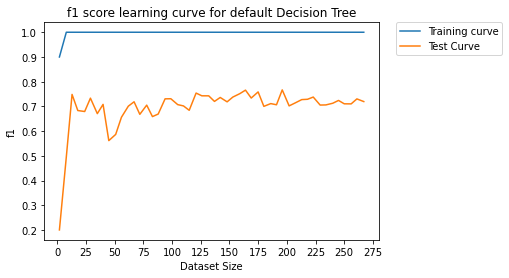

In [3]:
##Default learning Curve
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(random_state=42), X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("f1 score learning curve for default Decision Tree")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

getF1(train_sizes, test_mean)

In [4]:
##Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

##GridSearch
params = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.001, 0.005, 0.01, 0.014, 0.02, 0.04, 0.08, 0.1]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, n_jobs=-1, verbose=10, return_train_score=True, scoring='f1')
gs.fit(X_train, y_train)

##Best Results
best_parameter = gs.best_params_
best_score = gs.best_score_

print("best parameter: ", best_parameter)
print("best score: ", best_score)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
best parameter:  {'ccp_alpha': 0.014, 'criterion': 'gini'}
best score:  0.6860688073536371


In [5]:
results_data = pd.DataFrame(gs.cv_results_)
optimal_results_data = results_data.loc[results_data['param_criterion']=='entropy']
optimal_results_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.012957,0.001735,0.010517,0.002773,0.001,entropy,"{'ccp_alpha': 0.001, 'criterion': 'entropy'}",0.700000,0.476190,0.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.015778,0.004524,0.012047,0.004633,0.005,entropy,"{'ccp_alpha': 0.005, 'criterion': 'entropy'}",0.700000,0.476190,0.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.014409,0.003852,0.009579,0.003873,0.01,entropy,"{'ccp_alpha': 0.01, 'criterion': 'entropy'}",0.700000,0.545455,0.900000,...,0.989247,0.978495,0.994709,0.983957,0.994652,0.989362,0.983784,0.989247,0.988171,0.006762
7,0.013729,0.005412,0.011105,0.003509,0.014,entropy,"{'ccp_alpha': 0.014, 'criterion': 'entropy'}",0.666667,0.608696,0.818182,...,0.947917,0.945055,0.979167,0.967742,0.978723,0.961326,0.920635,0.983784,0.957446,0.019716
9,0.015318,0.004850,0.009868,0.002669,0.02,entropy,"{'ccp_alpha': 0.02, 'criterion': 'entropy'}",0.631579,0.545455,0.818182,...,0.857143,0.903955,0.952880,0.861878,0.936170,0.855556,0.880435,0.934066,0.898512,0.034517
11,0.015520,0.006159,0.008250,0.003828,0.04,entropy,"{'ccp_alpha': 0.04, 'criterion': 'entropy'}",0.615385,0.434783,0.833333,...,0.770732,0.768519,0.689189,0.795812,0.792453,0.791444,0.820809,0.771084,0.777950,0.034804
13,0.011363,0.002719,0.009053,0.002184,0.08,entropy,"{'ccp_alpha': 0.08, 'criterion': 'entropy'}",0.615385,0.538462,0.857143,...,0.705202,0.708571,0.689189,0.748603,0.792453,0.705202,0.713450,0.666667,0.729810,0.043070
15,0.013803,0.006054,0.009313,0.004739,0.1,entropy,"{'ccp_alpha': 0.1, 'criterion': 'entropy'}",0.500000,0.545455,0.857143,...,0.705202,0.708571,0.689189,0.748603,0.730337,0.705202,0.713450,0.738462,0.722478,0.019533


Text(0.5, 1.0, 'Validation for the Decision Tree')

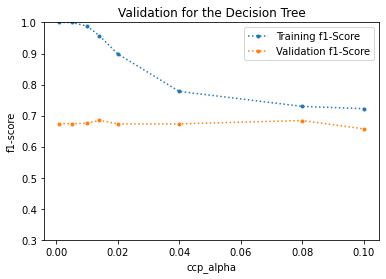

In [6]:
##GridSearch Plotting
fig, ax = plt.subplots()
optimal_results_data.plot(x='param_ccp_alpha', y='mean_train_score', label='Training f1-Score', ax=ax, marker='.', ls=':')
optimal_results_data.plot(x='param_ccp_alpha', y='mean_test_score', label='Validation f1-Score', ax=ax, marker='.', ls=':')

ax.set_xlabel('ccp_alpha')
ax.set_ylabel('f1-score')
ax.set_ylim(bottom=0.3, top=1.0)
ax.set_title("Validation for the Decision Tree")

[learning_curve] Training set sizes: [  2   8  13  18  24  29  35  40  45  51  56  62  67  72  78  83  88  94
  99 105 110 115 121 126 132 137 142 148 153 159 164 169 175 180 186 191
 196 202 207 213 218 223 229 234 240 245 250 256 261 267]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of 500 | elapsed:    0.4s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  93 out of 500 | elapsed:    0.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 144 out of 500 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 195 out of 500 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 246 out of 500 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 297 out of 500 | elapsed:    1.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 348 out of 500 | elapsed:    1.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 399 out of 500 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 450 out of 500 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


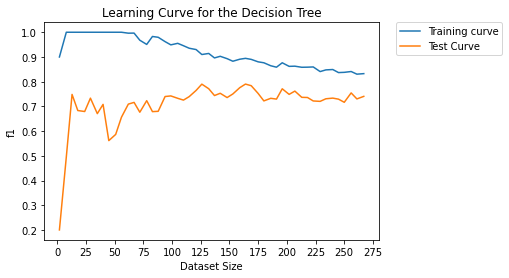

In [7]:
##learning Curve
#best parameter:  {'n_neighbors': 8, 'weights': 'uniform'}
optimal_df = DecisionTreeClassifier(random_state=42, ccp_alpha=0.014, criterion='gini')
train_sizes, train_scores, test_scores = learning_curve(optimal_df, X, y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,50), verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training curve')
plt.plot(train_sizes, test_mean, label='Test Curve')
plt.xticks(list(range(0, 300, 25)))
plt.xlabel("Dataset Size")
plt.ylabel("f1")
plt.title("Learning Curve for the Decision Tree")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [8]:
##Predictions
pred = prediction(optimal_df, X_train, y_train, X_test, y_test)
printPredictions(pred)
#optimal_df.fit(X_train, y_train)
#test_pred = optimal_df.predict(X_test)
#cRep = classification_report(y_test, test_pred, digits=6)
#f1Score = f1_score(y_test, test_pred)
#print(cRep)
#print('f1-Score: ', f1Score)
#plot_confusion_matrix(optimal_df, X_test, y_test, display_labels = ["Does not have HD", "Has HD"])

Time spent for prediction:  0.011755943298339844
              precision    recall  f1-score   support

           0     0.8500    0.8095    0.8293        42
           1     0.7714    0.8182    0.7941        33

    accuracy                         0.8133        75
   macro avg     0.8107    0.8139    0.8117        75
weighted avg     0.8154    0.8133    0.8138        75

f1-Score:  0.7941176470588236
